<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [2]:
iris            = pd.read_csv("./data/iris.csv")
lenses          = pd.read_csv("./data/lenses_final.csv")
car             = pd.read_csv("./data/cars.csv")
horsecolic      = pd.read_table("./data/horse-colic.data")

C:\Users\vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


<h1 style="text-align:center"> Validação de Modelos </h1>

<h2 style="text-align:center; margin:40px"> Validação de agrupamentos - Silhueta </h2>

![](img/sil.png)

A <b>silhueta</b> é uma métrica utilizada para mensurar a qualidade de um agrupamento <b>priorizando grupos densos/concisos e bem separados</b>, ou seja, favorecendo uma pequena distância intracluster e uma grande distância intercluster.

$$ s(x_i) = \frac{(B_i - A_i)}{\max(B_i, A_i)}$$

Onde $A_i$ é a distância média de $x_i$ até todos os outros objetos pertencentes ao mesmo cluster, e $B_i$ é a distância média de $x_i$ até todos os outros objetos pertencentes ao cluster mais próximo de $x_i$

A silhueta de uma partição é calculada como sendo a <b>média das silhuetas de cada observação $x_i$</b>

<h3 style="text-align:center; margin:40px"> A silhueta pode ser usada para estimar o melhor valor de K no K-Means </h3>

![](img/sil_base.png)

<h3> Scikit-Learn </h3>
Agora vamos utilizar o pacote <i>sklearn</i> para fazer o cálculo da silhueta para alguns valores de <b>K</b>.

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [4]:
baseDados = pd.read_csv('data/base_agrupamento_1.csv')
X = baseDados[['X','Y']]
K_min = 2
K_max = 30

Text(4, 0.7709092776823179, 'Melhor K : 3')

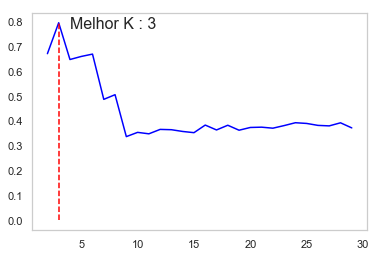

In [5]:
K = list(range(K_min, K_max))
sil = []
for i in range(K_min, K_max):
    km = KMeans(n_clusters = i)
    labels = km.fit_predict(X)
    sil.append(silhouette_score(X, labels))
plt.plot(K, sil, color = 'blue')
idx = np.argmax(sil)
plt.plot([K[idx], K[idx]], [0, sil[idx]], '--', color = 'red')
plt.text(K[idx]+1, sil[idx]-0.025, 'Melhor K : %d' % K[idx], fontdict={'fontsize':16})

<h2 style="text-align:center; margin:40px"> Validação de modelos supervisionados </h2>

<h2 style="text-align:center; margin:40px"> Underfitting e Overfitting </h2>

<b> Underfitting: </b> ocorre quando um modelo é incapaz de de se ajustar até mesmo aos dados de treinamento, e portanto também falha ao fazer predições em novas amostras
<ul>
    <li>Pode ocorrer quando uma regularização muito forte é aplicada ao modelo</li>
    <li>Pode ocorrer quando um modelo muito simples (ex: regressão linear) é aplicado em um problema complexo</li>
    <li>Pode ocorrer quando temos poucos dados rotulados e uma tarefa de aprendizado complexa (ex: classificação de imagens)</li>
</ul>

<b> Overfitting: </b> ocorre quando um modelo se ajusta perfeitamente aos dados de treinamento, porém não possui poder de generalização suficiente para fazer predições corretas com novas amostras
<ul>
    <li>Pode ocorrer quando não aplicamos regularização, deixando o modelo se ajustar livremente aos dados de treino</li>
    <li>Pode ocorrer quando um modelo muito complexo (ex: deep learning) é aplicado em um problema simples</li>
</ul>

![](img/under_over.png)

<h4><font color = "dimgrey">Uma reta (polinômio de grau 1) não é capaz de se ajustar aos dados</font></h4>
<h4><font color = "green">Um polinômio de grau 3 se ajusta relativamente bem aos dados</font></h4>
<h4><font color = "red">Um polinômio de grau 9 se ajusta perfeitamente aos dados, mas será que isso é bom?</font></h4>

<h2 style="text-align:center; margin:40px"> Combatendo o Overfitting - Validação Cruzada </h2>

![](img/cval.png)

<h2 style="text-align:center; margin:40px"> Hold-Out </h2>

![](img/holdout.png)

<h2 style="text-align:center; margin:40px"> K-Folds </h2>

![](img/kfolds.png)

<h2 style="text-align:center; margin:40px"> Leave-One-Out </h2>

![](img/leaveoneout.png)

<h3> Scikit-Learn </h3>
Agora vamos utilizar o pacote <i>sklearn</i> para fazer validação cruzada utilizando um modelo de <b>SVM</b>

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [7]:
baseDados = pd.read_csv('data/base_svm.csv')
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y

<h3> Hold-Out </h3>

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

** Overfitting **

In [10]:
model = SVC(kernel = 'rbf', C = 1, gamma = 1000)
model.fit(X_train, Y_train)
print('Acurácia no treino: %.2f' % model.score(X_train, Y_train))
print('Acurácia no teste: %.2f' % model.score(X_test, Y_test))

Acurácia no treino: 1.00
Acurácia no teste: 0.77


** Modelo Saudável **

In [11]:
model = SVC(kernel = 'rbf', C = 1, gamma = 1)
model.fit(X_train, Y_train)
print('Acurácia no treino: %.2f' % model.score(X_train, Y_train))
print('Acurácia no teste: %.2f' % model.score(X_test, Y_test))

Acurácia no treino: 1.00
Acurácia no teste: 1.00


** Underfitting **

In [12]:
model = SVC(kernel = 'rbf', C = 1, gamma = 0.001)
model.fit(X_train, Y_train)
print('Acurácia no treino: %.2f' % model.score(X_train, Y_train))
print('Acurácia no teste: %.2f' % model.score(X_test, Y_test))

Acurácia no treino: 0.50
Acurácia no teste: 0.49


<h3> K-Folds </h3>

In [13]:
from sklearn.model_selection import KFold

In [14]:
model = SVC(kernel = 'rbf', C = 1, gamma = 0.001)
scores = cross_val_score(model, X, Y, cv = KFold(n_splits = 10, shuffle = True), scoring = 'accuracy')
print('Acurácia no teste: %.2f +/- %.2f' % (scores.mean(), 2 * scores.std()))

Acurácia no teste: 0.42 +/- 0.06


<h3> Leave-One-Out </h3>

In [15]:
from sklearn.model_selection import LeaveOneOut

In [16]:
model = SVC(kernel = 'rbf', C = 1, gamma = 1)
scores = cross_val_score(model, X, Y, cv = LeaveOneOut(), scoring = 'accuracy')
print('Acurácia no teste: %.2f +/- %.2f' % (scores.mean(), 2 * scores.std()))

Acurácia no teste: 1.00 +/- 0.00


<h2 style="text-align:center; margin:40px"> Curvas de Aprendizado </h2>

![](img/curva_ap.png)

As <b>curvas de aprendizado</b> são representações gráficas que mostram o aprendizado de um modelo conforme sua experiência (quantidade de dados de treinamento) aumenta.

Estamos interessados em visualizar tanto as métricas de <font color="blue"><b>treinamento</b></font> quanto de <font color="green"><b>teste</b></font>.

Assim como a validação cruzada, estas curvas podem ser utilizadas para detectar <b>underfitting</b> e <b>overfitting</b>.

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier(max_depth = 2)
baseDados = pd.read_csv('data/breast.csv')
X = baseDados.loc[:, baseDados.columns != 'type']
Y = baseDados.type

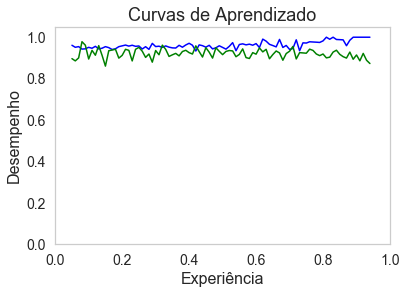

In [19]:
train_metrics = []
test_metrics = []
sizes = np.arange(0.05, 0.95, 0.01)
for i in sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = i)
    model.fit(X_train, Y_train)
    train_metrics.append(model.score(X_train, Y_train))
    test_metrics.append(model.score(X_test, Y_test))
    
plt.plot(sizes, train_metrics, color = 'blue')
plt.plot(sizes, test_metrics, color = 'green')
plt.xlim([0, 1]);
plt.ylim([0, 1.05]);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.xlabel('Experiência', fontsize = 16);
plt.ylabel('Desempenho', fontsize = 16);
plt.title('Curvas de Aprendizado', fontsize = 18);

<h2 style="text-align:center; margin:40px"> Grid Search </h2>

<b>Grid Search</b> é uma técnica para encontrar os melhores <b>hiperparâmetros</b> para um modelo, de forma que este modelo obtenha a melhor capacidade de generalização possível para o conjunto de dados a ser trabalhado.

<b>Hiperparâmetros:</b> parâmetros que não são otimizados automaticamente pelo modelo, e devem ser escolhidos pelo usuário de forma a melhor se adequar ao problema em questão.

<ul>
    <li><b>KNN:</b> Número de vizinhos <b>K</b></li>
    <li><b>Regressão (LASSO, Ridge, ElasticNet):</b> Taxa de aprendizado $\alpha$, parâmetro de regularização $C$</li>
    <li><b>Árvores de Decisão:</b> Altura máxima, número de folhas, etc...</li>
    <li><b>SVM Radial:</b> Parâmetro de regularização $C$, ajuste do kernel $\gamma$</li>
    <li><b>Redes Neurais:</b> Taxa de aprendizado $\alpha$, número de camadas ocultas, número de neurônios por camada oculta, etc...</li>
</ul>

O grid search é uma técnica de <b>força bruta</b>, que envolve testar todas as combinações de hiperparâmetros para um determinado conjunto de valores.

![](img/grid.png)

------------classificador somente para teste----------------------

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
MLP = MLPClassifier(activation = 'relu',
                    hidden_layer_sizes = (40, 20, 10),
                    learning_rate = 'constant',
                    learning_rate_init = 0.001,
                    max_iter = 5000)
baseDados = pd.read_csv('data/base_svm.csv')
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
MLP.fit(X,Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

-------------------------------------------------------------

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
GridSearch = GridSearchCV(estimator = SVC(kernel = 'rbf'),
                          param_grid = {'C' : [0.01, 0.1, 1, 10, 100],
                                        'gamma' : [0.01, 0.1, 1, 10, 100]},
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)
baseDados = pd.read_csv('data/base_svm.csv')
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
GridSearch.fit(X, Y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [24]:
results = pd.DataFrame(GridSearch.cv_results_)
results.sort_values(by = 'rank_test_score').round(3)

C:\Users\vinicius\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\vinicius\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\vinicius\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\vinicius\Anaconda3\lib\site-packages\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
12,0.004,0.000,0.001,0.000,1,1,"{'C': 1, 'gamma': 1}",1.00,1.00,1.00,...,1.000,0.000,1,1.000,1.000,1.000,1.000,1.000,1.000,0.000
17,0.002,0.000,0.001,0.000,10,1,"{'C': 10, 'gamma': 1}",1.00,1.00,1.00,...,1.000,0.000,1,1.000,1.000,1.000,1.000,1.000,1.000,0.000
13,0.007,0.000,0.002,0.000,1,10,"{'C': 1, 'gamma': 10}",1.00,1.00,1.00,...,1.000,0.000,1,1.000,1.000,1.000,1.000,1.000,1.000,0.000
23,0.004,0.000,0.001,0.000,100,10,"{'C': 100, 'gamma': 10}",1.00,1.00,1.00,...,1.000,0.000,1,1.000,1.000,1.000,1.000,1.000,1.000,0.000
11,0.004,0.000,0.003,0.003,1,0.1,"{'C': 1, 'gamma': 0.1}",1.00,1.00,1.00,...,1.000,0.000,1,1.000,1.000,1.000,1.000,1.000,1.000,0.000
18,0.006,0.001,0.001,0.000,10,10,"{'C': 10, 'gamma': 10}",1.00,1.00,1.00,...,1.000,0.000,1,1.000,1.000,1.000,1.000,1.000,1.000,0.000
15,0.006,0.000,0.002,0.000,10,0.01,"{'C': 10, 'gamma': 0.01}",1.00,1.00,1.00,...,1.000,0.000,1,1.000,1.000,1.000,1.000,1.000,1.000,0.000
16,0.003,0.001,0.001,0.000,10,0.1,"{'C': 10, 'gamma': 0.1}",1.00,1.00,1.00,...,1.000,0.000,1,1.000,1.000,1.000,1.000,1.000,1.000,0.000
6,0.008,0.002,0.002,0.000,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",1.00,1.00,1.00,...,1.000,0.000,1,1.000,1.000,1.000,1.000,1.000,1.000,0.000
20,0.002,0.000,0.001,0.000,100,0.01,"{'C': 100, 'gamma': 0.01}",1.00,1.00,1.00,...,1.000,0.000,1,1.000,1.000,1.000,1.000,1.000,1.000,0.000


<h2 style="text-align:center; margin:40px"> Métricas de Classificação </h2>

<h3> Matriz de confusão </h3>
Matriz onde cada linha representa valores observados e cada coluna representa valores preditos.

![](img/matconf2.png)

A matriz de confusão pode ser utilizada para extrair várias outras métricas importantes:

<h3> Acurácia = $\frac{TP+TN}{TP+TN+FP+FN}$</h3>
Quantas observações acertei?
<h3> Precisão = $\frac{TP}{TP+FP}$</h3>
De todas observações que marquei como positivo, quantas realmente eram?
<h3> Recall = $\frac{TP}{TP+FN}$</h3>
De todas observações que eram positivo, quantas eu realmente identifiquei?
<h3> F1-Score = $\frac{2 \cdot Precisão \cdot Recall}{Precisão + Recall}$</h3>
Média harmônica de Precisão e Recall
<h3> G-Measure = $\sqrt{Precisão \cdot Recall}$</h3>
Média geométrica de Precisão e Recall

![](img/f1.png)

<h3>KS (Kolmogorov-Smirnov)</h3>
É um teste estatístico utilizado para comparar distribuições de probabilidade. Podemos utilizá-lo para comparar a distribuição de <i>scores</i> de um modelo para as observações positivas e negativas, medindo assim quão bem o modelo pode separar as duas classes.

![](img/ks.png)

<h3>Curva ROC</h3>
É uma curva que representa graficamente a capacidade de um classificador separar as duas classes conforme variamos o <b>ponto de corte</b> que define quais observações serão marcadas como evento. No eixo $x$ temos o <b>FP</b> e no eixo $y$ temos o <b>TP</b> para um determinado ponto de corte. A curva ROC de um modelo aleatório é a reta $Y=X$.

![](img/roc.png)

<h3>Area Under Curve (AUC)</h3>
Área abaixo da curva ROC. Para um modelo aleatório, $AUC = \frac{1}{2}$. Então o baseline para AUC é $\frac{1}{2}$, e não 0.

<h3>Gini = $2 \cdot AUC - 1$</h3>
Normalização do AUC para o intervalo $[0, 1]$

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy.stats import ks_2samp
g_measure = lambda y_true, y_pred : np.sqrt(precision_score(y_true, y_pred) * recall_score(y_true, y_pred))
gini_score = lambda y_true, y_score : 2 * roc_auc_score(y_true, y_score) - 1

In [26]:
baseDados = pd.read_csv('data/base_svm.csv')
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.7, random_state = 40)
model = MLPClassifier(hidden_layer_sizes=(3,3),max_iter=5000, random_state = 42)
model.fit(X_train, Y_train)
pred = model.predict(X_test)
score = model.predict_proba(X_test)[:, 1]

confusion_matrix(Y_test, pred)

array([[162,  10],
       [ 27, 151]], dtype=int64)

Acurácia = 0.89
Precisão = 0.94
Recall = 0.85
F1 = 0.89
Gmeasure = 0.89
KS = 0.79
AUC = 0.93
Gini = 0.86


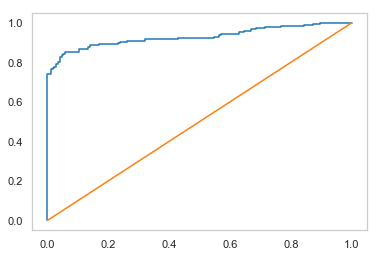

In [27]:
print('Acurácia = %.2f' % accuracy_score(Y_test, pred))
print('Precisão = %.2f' % precision_score(Y_test, pred))
print('Recall = %.2f' % recall_score(Y_test, pred))
print('F1 = %.2f' % f1_score(Y_test, pred))
print('Gmeasure = %.2f' % g_measure(Y_test, pred))
print('KS = %.2f' % ks_2samp(pred[Y_test == 0], pred[Y_test == 1])[0])
print('AUC = %.2f' % roc_auc_score(Y_test, score))
print('Gini = %.2f' % gini_score(Y_test, score))

x,y,_ = roc_curve(Y_test, score)
plt.plot([0]+x.tolist()+[1], [0]+y.tolist()+[1])
plt.plot([0,1],[0,1])